In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [28]:
df = pd.read_csv('BORIVALI_DWLR_REALTIME_multi.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

In [29]:
df

,timestamp,month,station_id,latitude,longitude,water_level_m,rainfall_mm,demand_mcm,aquifer_area_sqkm,specific_yield,temperature_c,land_use_type,policy_active,delta_h,recharge,availability,status
0,2023-01-19 01:00:00,1,Station_01,19.221162,72.857324,9.006755,0.187270,0.002656,2.0,0.15,22.918057,Urban,False,0.000000,0.000000,-2655.994520,Semi-Critical
1,2023-01-19 01:00:00,1,Station_05,19.223993,72.850285,8.991968,0.187270,0.003285,2.0,0.15,22.918057,Urban,False,0.000000,0.000000,-3285.175961,Semi-Critical
2,2023-01-19 01:00:00,1,Station_02,19.223668,72.846085,8.994060,0.187270,0.003101,2.0,0.15,22.918057,Urban,False,0.000000,0.000000,-3101.115012,Semi-Critical
3,2023-01-19 01:00:00,1,Station_04,19.227327,72.849121,8.996372,0.187270,0.003112,2.0,0.15,22.918057,Urban,False,0.000000,0.000000,-3111.852895,Semi-Critical
4,2023-01-19 01:00:00,1,Station_03,19.228639,72.845825,8.994758,0.187270,0.003025,2.0,0.15,22.918057,Urban,False,0.000000,0.000000,-3024.756432,Semi-Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131398,2026-01-18 00:00:00,1,Station_03,19.227158,72.855408,4.012385,0.275343,0.003017,2.0,0.15,23.668443,Urban,True,-0.016227,0.000000,-3017.255430,Safe
131395,2026-01-18 00:00:00,1,Station_04,19.229431,72.853593,4.003999,0.275343,0.003287,2.0,0.15,23.668443,Urban,True,-0.024208,0.000000,-3286.705782,Safe
131396,2026-01-18 00:00:00,1,Station_02,19.238529,72.845449,3.178290,0.275343,0.002711,2.0,0.15,23.668443,Urban,True,0.007446,2233.718651,-477.276043,Safe
131397,2026-01-18 00:00:00,1,Station_01,19.234939,72.850250,4.379169,0.275343,0.002780,2.0,0.15,23.668443,Urban,True,0.001983,594.806079,-2184.797359,Safe


In [30]:
def create_features(df):
    df = df.copy()
    df['hour'] = df['timestamp'].dt.hour
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    df['quarter'] = df['timestamp'].dt.quarter
    df['month'] = df['timestamp'].dt.month
    df['year'] = df['timestamp'].dt.year
    df['dayofyear'] = df['timestamp'].dt.dayofyear
    return df

df = create_features(df)

In [31]:
df

,timestamp,month,station_id,latitude,longitude,water_level_m,rainfall_mm,demand_mcm,aquifer_area_sqkm,specific_yield,...,policy_active,delta_h,recharge,availability,status,hour,dayofweek,quarter,year,dayofyear
0,2023-01-19 01:00:00,1,Station_01,19.221162,72.857324,9.006755,0.187270,0.002656,2.0,0.15,...,False,0.000000,0.000000,-2655.994520,Semi-Critical,1,3,1,2023,19
1,2023-01-19 01:00:00,1,Station_05,19.223993,72.850285,8.991968,0.187270,0.003285,2.0,0.15,...,False,0.000000,0.000000,-3285.175961,Semi-Critical,1,3,1,2023,19
2,2023-01-19 01:00:00,1,Station_02,19.223668,72.846085,8.994060,0.187270,0.003101,2.0,0.15,...,False,0.000000,0.000000,-3101.115012,Semi-Critical,1,3,1,2023,19
3,2023-01-19 01:00:00,1,Station_04,19.227327,72.849121,8.996372,0.187270,0.003112,2.0,0.15,...,False,0.000000,0.000000,-3111.852895,Semi-Critical,1,3,1,2023,19
4,2023-01-19 01:00:00,1,Station_03,19.228639,72.845825,8.994758,0.187270,0.003025,2.0,0.15,...,False,0.000000,0.000000,-3024.756432,Semi-Critical,1,3,1,2023,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131398,2026-01-18 00:00:00,1,Station_03,19.227158,72.855408,4.012385,0.275343,0.003017,2.0,0.15,...,True,-0.016227,0.000000,-3017.255430,Safe,0,6,1,2026,18
131395,2026-01-18 00:00:00,1,Station_04,19.229431,72.853593,4.003999,0.275343,0.003287,2.0,0.15,...,True,-0.024208,0.000000,-3286.705782,Safe,0,6,1,2026,18
131396,2026-01-18 00:00:00,1,Station_02,19.238529,72.845449,3.178290,0.275343,0.002711,2.0,0.15,...,True,0.007446,2233.718651,-477.276043,Safe,0,6,1,2026,18
131397,2026-01-18 00:00:00,1,Station_01,19.234939,72.850250,4.379169,0.275343,0.002780,2.0,0.15,...,True,0.001983,594.806079,-2184.797359,Safe,0,6,1,2026,18


In [32]:
df = pd.get_dummies(df, columns=['status'], dtype=int)

# Identify the names of the newly created status columns
status_cols = [col for col in df.columns if col.startswith('status_')]

# 4. Prepare Training Targets and Features
# We include numerical targets AND our one-hot encoded status columns
targets = ['water_level_m', 'rainfall_mm', 'temperature_c', 'demand_mcm', 'availability'] + status_cols
features = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']

In [33]:
# last_timestamp = df['timestamp'].max()
# future_timestamps = pd.date_range(
#     start=last_timestamp + pd.Timedelta(hours=1), 
#     periods=24, 
#     freq='h'
# )
# future_df = pd.DataFrame({'timestamp': future_timestamps})
# future_df = create_features(future_df)
models = {}
metrics_summary = []
# Split data into training and validation (test) sets to calculate RMS
# Using a 80-20 split
X = df[features]

In [34]:
df

,timestamp,month,station_id,latitude,longitude,water_level_m,rainfall_mm,demand_mcm,aquifer_area_sqkm,specific_yield,...,recharge,availability,hour,dayofweek,quarter,year,dayofyear,status_Critical,status_Safe,status_Semi-Critical
0,2023-01-19 01:00:00,1,Station_01,19.221162,72.857324,9.006755,0.187270,0.002656,2.0,0.15,...,0.000000,-2655.994520,1,3,1,2023,19,0,0,1
1,2023-01-19 01:00:00,1,Station_05,19.223993,72.850285,8.991968,0.187270,0.003285,2.0,0.15,...,0.000000,-3285.175961,1,3,1,2023,19,0,0,1
2,2023-01-19 01:00:00,1,Station_02,19.223668,72.846085,8.994060,0.187270,0.003101,2.0,0.15,...,0.000000,-3101.115012,1,3,1,2023,19,0,0,1
3,2023-01-19 01:00:00,1,Station_04,19.227327,72.849121,8.996372,0.187270,0.003112,2.0,0.15,...,0.000000,-3111.852895,1,3,1,2023,19,0,0,1
4,2023-01-19 01:00:00,1,Station_03,19.228639,72.845825,8.994758,0.187270,0.003025,2.0,0.15,...,0.000000,-3024.756432,1,3,1,2023,19,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131398,2026-01-18 00:00:00,1,Station_03,19.227158,72.855408,4.012385,0.275343,0.003017,2.0,0.15,...,0.000000,-3017.255430,0,6,1,2026,18,0,1,0
131395,2026-01-18 00:00:00,1,Station_04,19.229431,72.853593,4.003999,0.275343,0.003287,2.0,0.15,...,0.000000,-3286.705782,0,6,1,2026,18,0,1,0
131396,2026-01-18 00:00:00,1,Station_02,19.238529,72.845449,3.178290,0.275343,0.002711,2.0,0.15,...,2233.718651,-477.276043,0,6,1,2026,18,0,1,0
131397,2026-01-18 00:00:00,1,Station_01,19.234939,72.850250,4.379169,0.275343,0.002780,2.0,0.15,...,594.806079,-2184.797359,0,6,1,2026,18,0,1,0


In [35]:
for target in targets:
    y = df[target]
    # Range for normalization (Avoid division by zero if max == min)
    target_range = y.max() - y.min()
    if target_range == 0: target_range = 1
    # Split historical data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    models[target] = model
    
    # --- ADDED: RMS Calculation ---
    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    nrmse = rmse / target_range
    metrics_summary.append({
        'Target': target,
        'RMSE': rmse,
        'NRMSE': nrmse
    })
    
metrics_df = pd.DataFrame(metrics_summary)
print("\n--- Accuracy Metrics ---")
print(metrics_df.to_string(index=False))


--- Accuracy Metrics ---
              Target        RMSE    NRMSE
       water_level_m    0.445612 0.034278
         rainfall_mm    0.603126 0.012081
       temperature_c    0.067374 0.004166
          demand_mcm    0.000434 0.108397
        availability 2522.775726 0.011140
     status_Critical    0.123327 0.123327
         status_Safe    0.150728 0.150728
status_Semi-Critical    0.194744 0.194744


In [36]:
last_timestamp = df['timestamp'].max()
future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=24, freq='h')
future_df = pd.DataFrame({'timestamp': future_timestamps})
future_df = create_features(future_df)

for target in targets:
    future_df[target] = models[target].predict(future_df[features])

# 7. Convert One-Hot back to Classification
future_df['predicted_status'] = future_df[status_cols].idxmax(axis=1).str.replace('status_', '')



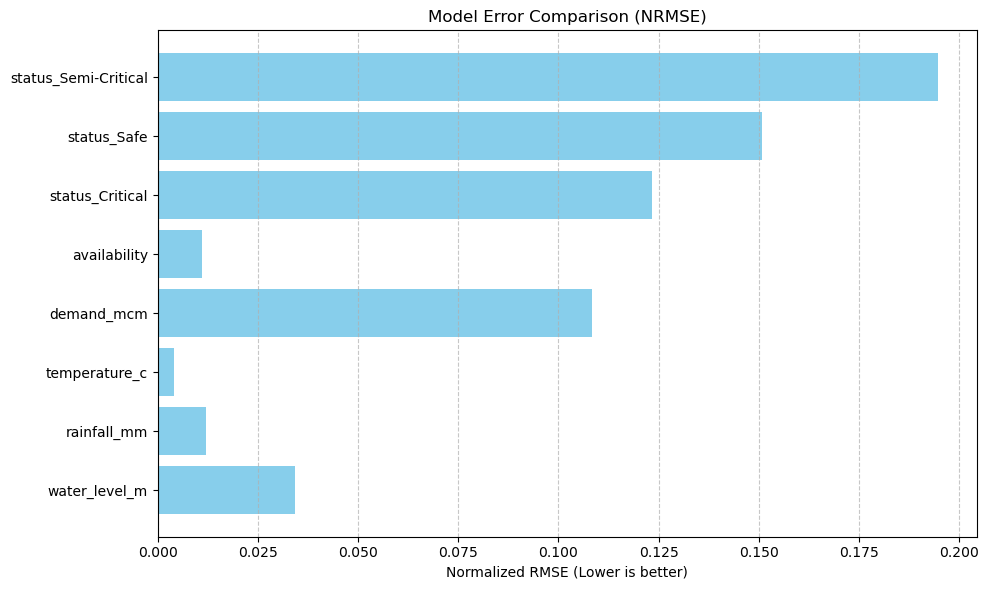

In [37]:
plt.figure(figsize=(10, 6))
plt.barh(metrics_df['Target'], metrics_df['NRMSE'], color='skyblue')
plt.xlabel('Normalized RMSE (Lower is better)')
plt.title('Model Error Comparison (NRMSE)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
future_df.to_csv(r"24hrs_rfr.csv")